# Homework 2

> 编辑日期：2023/05/23

## 实验要求

1. 请自行确定实验数据集，根据数据特点自己编程实现一个或多个聚类算法（不能直接调用如kmean等库函数），对数据进行聚类并可视化。

2. 请自己编程实现一个分类器（如决策树、朴素贝叶斯、基于规则的分类器等），在上述数据集上与商用系统中的同类分类器在不同指标上开展性能对比，并用t检验确定你的分类器和对比的分类器的性能差异是否显著？

3. 对实验数据集进行聚类操作，并针对每个类别分别应用你在b中实现的分类器，并与不做聚类操作时的结果进行对比分析，看看accuracy等指标的变化并尝试进行分析。

## 1 聚类算法实现

### 1.1 Hierarchical Clustering

#### 1.1.1 数据集

> 因为 Hierarchical Clustering 算法复杂度较高，此处选择了一个较小的数据集进行呈现

- 数据集 "[China's GDP in Province](https://www.kaggle.com/datasets/concyclics/chinas-gdp-in-province)" 来自 Kaggle，描述了 1992-2020 中国部分省份的 GDP 增长情况。

- 数据结构概览如下：

In [2]:
# Preview of Data Source

import pandas as pd # 使用 pandas 进行简单的数据处理

# 读取并打印前3行数据
gdp_data = pd.read_csv("./Chinas GDP in Province.csv")
print(gdp_data.head(3))

   Unnamed: 0  Beijing  Tianjin    Hebei   Shanxi  Inner Mongolia  Liaoning   
0        2020  36102.6  14083.7  36206.9  17651.9         17359.8   25115.0  \
1        2019  35445.1  14055.5  34978.6  16961.6         17212.5   24855.3   
2        2018  33106.0  13362.9  32494.6  15958.1         16140.8   23510.5   

     Jilin  Heilongjiang  Shanghai  ...  Chongqing  Sichuan  Guizhou   Yunnan   
0  12311.3       13698.5   38700.6  ...    25002.8  48598.8  17826.6  24521.9  \
1  11726.8       13544.4   37987.6  ...    23605.8  46363.8  16769.3  23223.8   
2  11253.8       12846.5   36011.8  ...    21588.8  42902.1  15353.2  20880.6   

    Tibet  Shaanxi   Gansu  Qinghai  Ningxia  Xinjiang  
0  1902.7  26181.9  9016.7   3005.9   3920.6   13797.6  
1  1697.8  25793.2  8718.3   2941.1   3748.5   13597.1  
2  1548.4  23941.9  8104.1   2748.0   3510.2   12809.4  

[3 rows x 32 columns]


显然，表示“年份”的列名稍微有点不对劲 ——下面进行对该列重命名处理，并重设为数据集的 `index` 。

In [3]:
# # rename
gdp_data.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
# # set as index
gdp_data.set_index("Year", inplace=True)
# show result
print(gdp_data.T.head(3))

Year        2020     2019     2018     2017     2016     2015     2014   
Beijing  36102.6  35445.1  33106.0  29883.0  27041.2  24779.1  22926.0  \
Tianjin  14083.7  14055.5  13362.9  12450.6  11477.2  10879.5  10640.6   
Hebei    36206.9  34978.6  32494.6  30640.8  28474.1  26398.4  25208.9   

Year        2013     2012     2011  ...    2001    2000    1999    1998   
Beijing  21134.6  19024.7  17188.8  ...  3861.5  3277.8  2759.8  2439.1  \
Tianjin   9945.4   9043.0   8112.5  ...  1756.9  1591.7  1435.6  1344.7   
Hebei    24259.6  23077.5  21384.7  ...  5062.9  4628.2  4158.9  3924.5   

Year       1997    1996    1995    1994    1993    1992  
Beijing  2118.1  1819.4  1516.2  1149.8   888.9   710.2  
Tianjin  1264.6  1121.9   932.0   732.9   538.9   411.0  
Hebei    3652.1  3198.0  2701.2  2114.5  1620.8  1278.5  

[3 rows x 29 columns]


对初始数据进行简单的可视化（此处使用折线图展示我国部分省份 GDP 增长趋势）：

<Axes: title={'center': "China's GDP Growth in Province"}, xlabel='Year', ylabel='GDP(100m RMB)'>

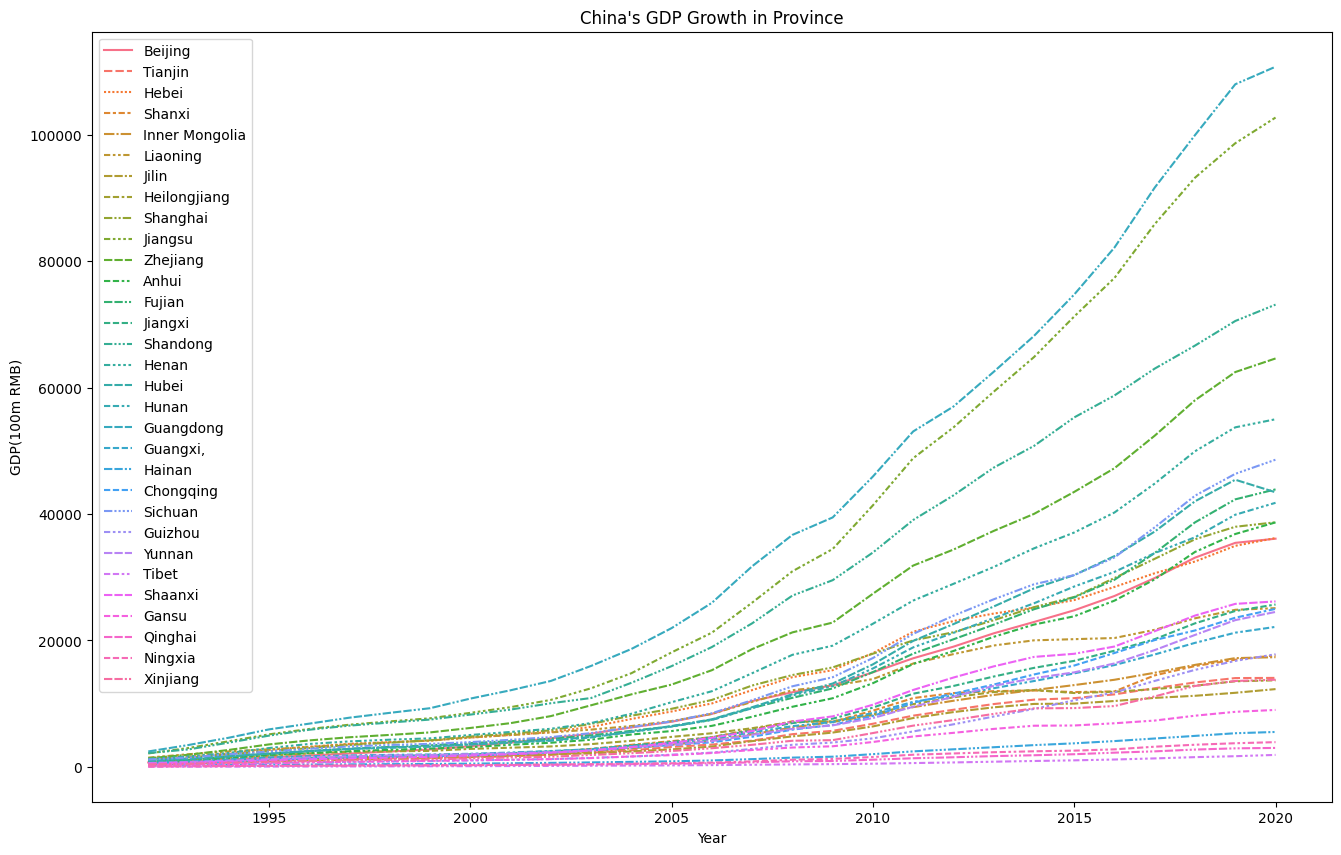

In [4]:
# 使用 matplotlib + seaborn 进行绘图
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.title("China's GDP Growth in Province")
plt.xlabel("Year")
plt.ylabel("GDP(100m RMB)")

sns.set_color_codes = True
sns.lineplot(data=gdp_data)

#### 1.1.2 算法实现

- 此处使用 Bottom-Up 的方法（合并法）实现 Hierarchical Clustering

- 使用 Average Linkage 来衡量两个 Cluster 之间的距离，即对于集合 $Cluster_A=\{A,B\}, Cluster_B=\{C,D\}$：

    $$
        dist_{A,B} = \frac{\sqrt{(A-C)^2}+\sqrt{(A-D)^2}+\sqrt{(B-C)^2}+\sqrt{(B-D)^2}}{4}
    $$

In [5]:
import numpy as np

hire_labels = np.array(gdp_data.columns)
print("抽取的标签数组为：", hire_labels)

print("\n抽取的数据为：\n[")
hire_data = []
# 转置以正确提取数据
for i in range(0, len(gdp_data.columns)):
    line = gdp_data.T.iloc[i].values.tolist()
    print("  ", line, ",")
    hire_data.append(line)
print("]")

抽取的标签数组为： ['Beijing' 'Tianjin' 'Hebei' 'Shanxi' 'Inner Mongolia' 'Liaoning' 'Jilin'
 'Heilongjiang' 'Shanghai' 'Jiangsu' 'Zhejiang' 'Anhui' 'Fujian' 'Jiangxi'
 'Shandong' 'Henan' 'Hubei' 'Hunan' 'Guangdong' 'Guangxi,' 'Hainan'
 'Chongqing' 'Sichuan' 'Guizhou' 'Yunnan' 'Tibet' 'Shaanxi' 'Gansu'
 'Qinghai' 'Ningxia' 'Xinjiang']

抽取的数据为：
[
   [36102.6, 35445.1, 33106.0, 29883.0, 27041.2, 24779.1, 22926.0, 21134.6, 19024.7, 17188.8, 14964.0, 12900.9, 11813.1, 10425.5, 8387.0, 7149.8, 6252.5, 5267.2, 4525.7, 3861.5, 3277.8, 2759.8, 2439.1, 2118.1, 1819.4, 1516.2, 1149.8, 888.9, 710.2] ,
   [14083.7, 14055.5, 13362.9, 12450.6, 11477.2, 10879.5, 10640.6, 9945.4, 9043.0, 8112.5, 6830.8, 5709.6, 5182.4, 4158.4, 3538.2, 3158.6, 2621.1, 2257.8, 1926.9, 1756.9, 1591.7, 1435.6, 1344.7, 1264.6, 1121.9, 932.0, 732.9, 538.9, 411.0] ,
   [36206.9, 34978.6, 32494.6, 30640.8, 28474.1, 26398.4, 25208.9, 24259.6, 23077.5, 21384.7, 18003.6, 15306.9, 14200.1, 12152.9, 10043.0, 8773.4, 7588.6, 6333.6, 5518.9,

2. 算法的自主实现：

    - `euler_distance()` 
    
        用于计算两个给定点之间的欧拉距离（支持高纬）

    - `ClusterNode` 
    
        用于记录 Cluster 的相关信息

    - `Hierarchical` 
    
        用于实现 Hierarchical Clustering，并产生可视化数据

In [6]:
import math

def euler_distance(point1: np.ndarray, point2: list) -> float:
    distance = 0.0
    for a, b in zip(point1, point2):
        distance += math.pow(a - b, 2)
    return math.sqrt(distance)


class ClusterNode(object):

    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1):
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count


class Hierarchical(object):

    def __init__(self, data, k = 1, labelName=None):
        assert k > 0
        self.k = k
        self.data = data
        self.labelName = labelName
        self.labels = None
        self.tree = []


    def fit(self):
        nodes = [ClusterNode(vec=v, id=i) for i,v in enumerate(self.data)]
        distances = {}
        point_num, future_num = np.shape(self.data)  # 特征的维度
        self.labels = [ -1 ] * point_num
        currentclustid = -1
        while len(nodes) > self.k:
            min_dist = math.inf
            nodes_len = len(nodes)
            closest_part = None  # 表示最相似的两个聚类
            for i in range(nodes_len - 1):
                for j in range(i + 1, nodes_len):
                    # 为了不重复计算距离，保存在字典内
                    d_key = (nodes[i].id, nodes[j].id)
                    if d_key not in distances:
                        distances[d_key] = euler_distance(nodes[i].vec, nodes[j].vec)
                    d = distances[d_key]
                    if d < min_dist:
                        min_dist = d
                        closest_part = (i, j)
            # 合并两个聚类
            part1, part2 = closest_part
            node1, node2 = nodes[part1], nodes[part2]
            new_vec = [ (node1.vec[i] * node1.count + node2.vec[i] * node2.count ) / (node1.count + node2.count)
                        for i in range(future_num)]  ##??
            new_node = ClusterNode(vec=new_vec,
                                   left=node1,
                                   right=node2,
                                   distance=min_dist,
                                   id=currentclustid,
                                   count=node1.count + node2.count)
            currentclustid -= 1
            del nodes[part2], nodes[part1]
            nodes.append(new_node)
        self.nodes = nodes
        self.tree.append(self.get_tree(self.nodes[0]))

    # 用于生成符合 pyechart 树状图要求的数据
    def get_tree(self, root: ClusterNode):
        node = {}
        if root.count == 1:
            node['name'] = self.labelName[root.id]
        else:
            node['name'] = ""

        node['children'] = []
        if root.left:
            node['children'].append(self.get_tree(root.left))
        if root.right:
            node['children'].append(self.get_tree(root.right))

        return node

myTree = Hierarchical(data=hire_data, labelName=hire_labels.tolist())
myTree.fit()

此处使用 Pyecharts 对聚类结果进行可视化：

In [7]:
import pyecharts.options as opts
from pyecharts.charts import Tree

Tree().add(
    series_name="",
    data=myTree.tree,
    orient="TB",
    initial_tree_depth=-1,
    leaves_label_opts=opts.LabelOpts(
        position='bottom',
        rotate=40)
).render_notebook()

3. 使用 Scipy 实现

    指定 `method = 'average', metric = 'euclidean'`，使实际方案与自主实现的层次聚类算法一致

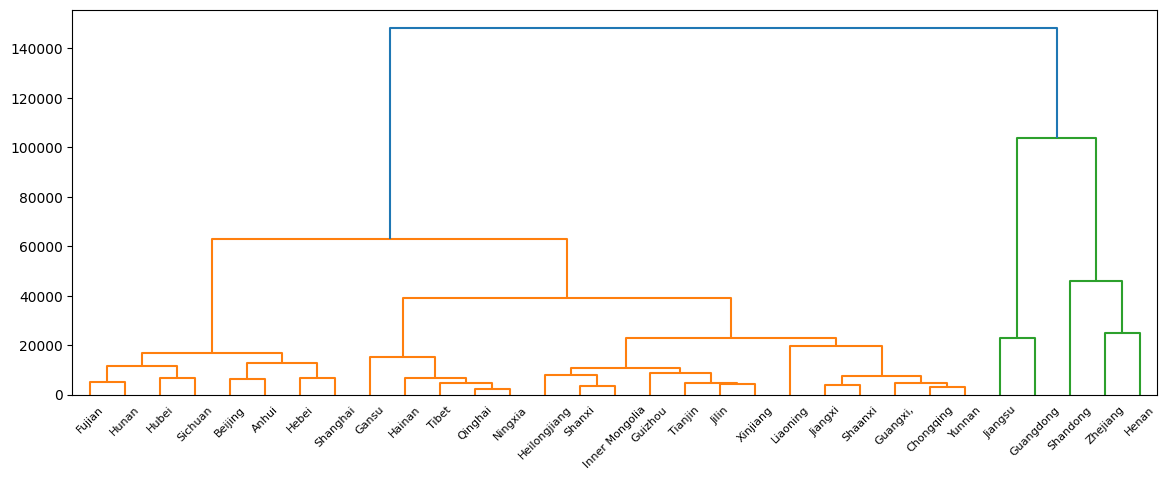

In [8]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(14,5))
hire_plt_data = sch.linkage(y=hire_data, method='average', metric='euclidean')
sch.dendrogram(hire_plt_data, labels=hire_labels)
plt.show()

对比上面两张图可以发现：自主实现的层次聚类结果与 Scipy 的计算结果是一致的（虽然 Pyecharts 的可视化结果略微有些抽象）。

### 1.2 K-Means

#### 1.2.1 数据集
> 因为对省份 GDP 聚类的意义不大，这里换了一个数据集（光看名字就非常适合聚类呢）

- 数据集 "[Wine Dataset for Clustering](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)" 来自 Kaggle，这些数据是对意大利同一地区三种不同栽培品种的葡萄酒进行化学分析的结果，确定了三种类型的葡萄酒中的13种成分的数值信息。

- 数据结构概览如下：

In [9]:
import pandas as pd

data = pd.read_csv('./wine.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


为方便后续处理，下面对数据进行简单的标准化处理：

In [10]:
print("BEFORE:")
print(data.head(3), "\n")

print("AFTER:")
data = (data - data.min()) / (data.max() - data.min())
print(data.head(3))

BEFORE:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols   
0    14.23        1.71  2.43          15.6        127           2.80  \
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue   
0        3.06                  0.28             2.29             5.64  1.04  \
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185   

AFTER:
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols   
0  0.842105    0.191700  0.572193      0.257732   0.619565       0.627586  \
1  0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2  0.560526    0.320158  0.700535      0.412371   0.336957       0

显然，我们的 Normalization 操作成功的将所有数据重新映射到了 [0,1] 区间内。

#### 1.2.2 算法实现

- K-Means 聚类算法流程如下：

    1. 从集合中随机选取 K 个元素，作为 K 个子集各自的中心

    2. 计算集合中其余元素到 K 个中心的距离（欧氏距离），将其划分至最近的子集

    3. 根据该轮聚类结果重新计算各子集的中心（子集内所有元素各维度的算数平均）
    
    4. 对集合中全体元素以新的中心为基准重新进行聚类
    
    5. 重复3-4直至聚类结果不再变化


- 下面是一个简单的实现：

    - `distance()` 用于计算两个给定点之间的欧氏距离^2
    
    - `k_means()` 用于实现对给定数据集实现 K-means 聚类

In [11]:
from typing import List
import random

def distance(l1: List[float], l2: List[float]) -> float:
    assert len(l1) == len(l2)
    distance = 0.0
    for a, b in zip(l1, l2):
        distance += math.pow(a - b, 2)
    return distance

def k_means(df: pd.DataFrame, n_clusters: int) -> List[int]:
    columns = df.columns
    
    # 随机选取初始的 K 个中心
    coord_means = [[random.random() for _ in range(len(columns))] for _ in range(n_clusters)]
    close_mean1 = pd.Series([-1 for _ in range(df.shape[0])])
    close_mean2 = pd.Series([-2 for _ in range(df.shape[0])])
    
    # 当聚类结果（子集中心）不再变化时停止循环
    while list(close_mean1) != list(close_mean2):
        close_mean1 = close_mean2
        close_mean2 = pd.Series([-1 for _ in range(df.shape[0])])
        
        # 将每个点分类至最近的中心所在子集
        for i in range(df.shape[0]):
            dist = []
            for coord_mean in coord_means:
                dist.append(distance(list(df.iloc[i,]), coord_mean))
            close_mean2[i] = dist.index(min(dist))
        
        # 计算每个子集的新中心
        for j, coord_mean in enumerate(coord_means):
            if len(df[close_mean2 == j]) != 0:
                for k, column in enumerate(columns):
                    coord_mean[k] = df.loc[close_mean2 == j, column].mean()
            else:
                for k, column in enumerate(columns):
                    coord_mean[k] = random.random()
    
    return close_mean2

- 对数据进行聚类，并使用 Sum of Distances 来选取最佳的 K 值：

In [12]:
random.seed(1)

# 选取 K = [1，10]
for i in range(1, 11):
    data[i] = k_means(data, i)

# 计算每种 K 取值下的 sum(distances)
n_clusters = list(range(1,11))
sum_dist = []

for i in range(1, 11):
    clusters = sorted(data[i].unique())
    sum = 0
    
    for cluster in clusters:
        coord = list(data.loc[data[i] == cluster, :'Proline'].mean())
        
        for ind in data.loc[data[i] == cluster,].index:
            sum += distance(list(data.iloc[ind, :13]), coord)
            
    sum_dist.append(sum)

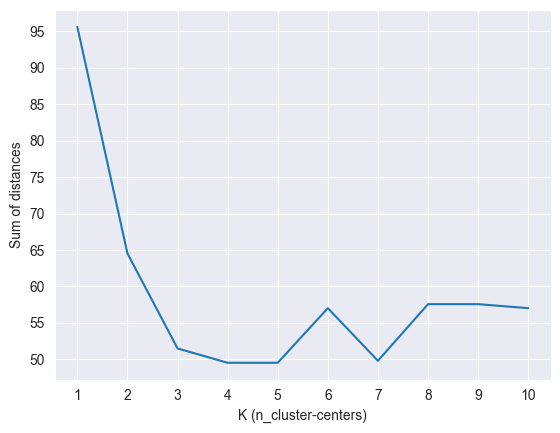

In [13]:
# 可视化
import seaborn as sns
import matplotlib

sns.set_style('darkgrid')
plot = sns.lineplot(x = n_clusters, y = sum_dist, errorbar = None)
plot.set(xlabel = 'K (n_cluster-centers)', ylabel = 'Sum of distances')
plot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
plot.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
plt.show()

- 由上图可知，当 $ K \in [2,4] $ 时，$ sum\_distances $ 随 $ K $ 的增长急剧下降，随后下降速率放缓乃至回升。

    因此，对于本数据集，$ Optimal\_K = 3 $ => 这和数据集本身情况一致（本数据集描述了三种不同品种的葡萄酒）

- 下面对 $ K \in [2,4] $ 的聚类结果进行可视化：

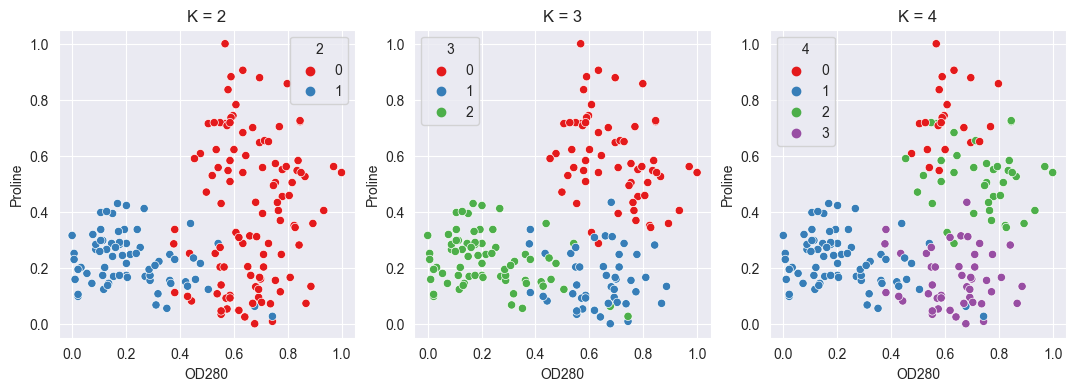

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (13, 4))

for i in range(3):
    ax[i].set_title("K = " + str(i+2))
    sns.scatterplot(x = data.iloc[:, 11], y = data.iloc[:, 12], ax = ax[i], hue = data[i + 2], palette = 'Set1')

## 2 分类器实现

### 2.1 数据集

- 数据集 "[Brain Tumor](https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor)" 来自 Kaggle。

- 数据结构概览如下：

    - `Class` 列为本行数据分类结果：1 - Tumor，0 - Non Tumor。

    - 后续各列包括 5个 first-order features 和 8个 texture features。

In [118]:
data = pd.read_csv('./Brain Tumor.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

下面对数据进行简单的预处理：

- 删除无用的 `Image` 列

    > 朴素贝叶斯作为概率模型关心的是变脸的分布与变量类型之间的条件概率，不需要进行标准化处理

- 按照 8:2 的比例划分训练集与测试集

In [119]:
# 简单预处理
data = data.drop("Image", axis=1)

from sklearn.model_selection import train_test_split
# 特征划分至 X 集合，标签划分至 Y 集合
X = data.iloc[:, 1:].to_numpy()
Y = data.loc[:, 'Class'].tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("训练集数据量：", len(Y_train), ", 测试集数据量：", len(Y_test))

训练集数据量： 3009 , 测试集数据量： 753


### 2.2 朴素贝叶斯分类器实现

- 本次实验计划手搓一下朴素贝叶斯分类器(Naive Bayes Classifier)

- 该方法假设所有特征之间都是互相独立的：

    - 这一假设显著降低了分类过程的时空开销，也使得算法逻辑简单、易于实现

    - 但在实际应用中这一假设往往不成立，导致在属性数量较多 / 关联性较大时分类效果较差

    > Anyway，方便搓出来就完事了

In [133]:
from collections import Counter

class Beyes(object):
    def __init__(self):
        self.length = -1             # 测试集数据量
        self.train_target_list = []  # 目标值类别集合
        self.p_train_target = {}     # 各个目标值概率
        self.split_data_lis = []     # 各条件概率对应的数据集
        self.feature_p_lis = []      # 特征概率
        self.predict = []            # 保存测试集分类结果

    # 计算P(Yk)
    def fit(self, train_data, train_target):
        train_length = train_data.shape[0]
        self.length = train_length
        target_list = list(set(train_target))  # 去重
        self.train_target_list = target_list   # 写入对象特征
        target_classifier = dict(Counter(train_target))  # 保存目标值的分类计数
        train_data = pd.DataFrame(train_data)
        train_data['target'] = train_target
        for target in self.train_target_list:
            self.p_train_target[target] = target_classifier[target]/self.length  # 保存各目标值的概率
            split_data = train_data[train_data['target'] == target]
            self.split_data_lis.append(split_data)

    # 计算每一个测试数据所处的类别
    def p_test_data(self, sample):
        result_p = []
        for j in range(len(self.train_target_list)):
            p_label = 1
            this_target = self.train_target_list[j]
            this_data = self.split_data_lis[j]
            for i in range(0, sample.shape[0]):
                # 计算一列数据中各类别的数量
                feature_num_dict = dict(Counter(this_data[i]))  
                if sample[i] in feature_num_dict:
                    label_num = feature_num_dict.get(sample[i])
                    # 计算单个特征的条件概率
                    p_label = p_label*(label_num/this_data.shape[0]) 
                else:
                    # 加入拉普拉斯平滑系数解决概率为0的情况
                    p_label = p_label*(1/(this_data.shape[0]+len(feature_num_dict)))
            # 计算该样本属于该特征的概率
            this_target_p = p_label*self.p_train_target.get(this_target)  
            result_p.append(this_target_p)
        # 概率最大的分类
        position = result_p.index(max(result_p))  
        return self.train_target_list[position]

    # 对测试集进行分类
    def classifier(self, test_data):
        test_data = pd.DataFrame(test_data)
        test_data['target'] = test_data.apply(self.p_test_data, axis=1)
        # 将分类结果存储至 self.predict
        self.predict = list(test_data['target'])

    # 计算分类准确率
    def score(self, test_target):
        count = 0
        for i in range(0, len(test_target)):
            if test_target[i] == self.predict[i]:
                count += 1
        score = count/len(test_target)
        print('accuracy: ', '{:.2f}'.format(score*100), "%")

训练模型，并使用测试集进行检验：

In [142]:
import time

# 训练模型
start = time.time()
classifier = Beyes()
classifier.fit(X_train, Y_train)
end = time.time()
print("training time:", end-start)

start = time.time()
classifier.classifier(X_test)
end = time.time()
print("predict time:", end-start)

classifier.score(Y_test)

training time: 0.0047757625579833984
predict time: 3.57155179977417
accuracy:  51.79 %


- 可以看到 `accuracy` 非常的惨淡（几次测试的平均值在 51% 上下波动）

- 但该算法在 `sklearn` 提供的 `iris` 测试集上约有 90% 的准确率，猜测是几个 feature 之间并不相互独立导致分类效果不佳

### 2.3 与 Sklearn 的对比

In [143]:
from sklearn.naive_bayes import GaussianNB

# 因为 sklearn 没有提供计算准确性的方法，自己实现一下
def calc_accuracy(predict, actual):
    assert(len(predict) == len(actual))
    count = 0
    total = len(predict)
    for p, a in zip(predict, actual):
        if p == a:
            count += 1
    print('accuracy: ', '{:.2f}'.format(count/total*100), "%")

clf = GaussianNB()
start = time.time()
clf.fit(X=X_train, y=Y_train)
end = time.time()
print("training time:", end-start)

start = time.time()
skl_res = clf.predict(X=X_test).tolist()
end = time.time()
print("predict time:", end-start)

calc_accuracy(predict=skl_res, actual=Y_test)

training time: 0.003918886184692383
predict time: 0.0010771751403808594
accuracy:  95.62 %


结果已经非常直观了：相差 10^3 的预测时间 + 相差一倍的预测准确率（应该没有必要再用t检验了吧）

=> 差异非常的显著，是在下太菜了(可是理论上这么算没有问题？)

## 3 对比分析

1. 聚类

    尝试通过 K-Means 聚类挽救一下凄凉的分类器性能 —— 由于数据集本身就是二分类的，这里直接取 K = 2

In [165]:
# 重新读取数据并进行预处理（丢掉标签捏）
data = pd.read_csv('./Brain Tumor.csv')
data = data.drop("Image", axis=1)

# 保存一下原始的分类数据
init_tag = data.loc[:, 'Class']

# 使用 K-Means 进行聚类（K = 2）
random.seed(1)
clustered = k_means(data, 2)

下面对聚类结果与原始 Class 进行可视化对比：

<Axes: title={'center': 'Cluster Result'}, xlabel='Homogeneity', ylabel='Dissimilarity'>

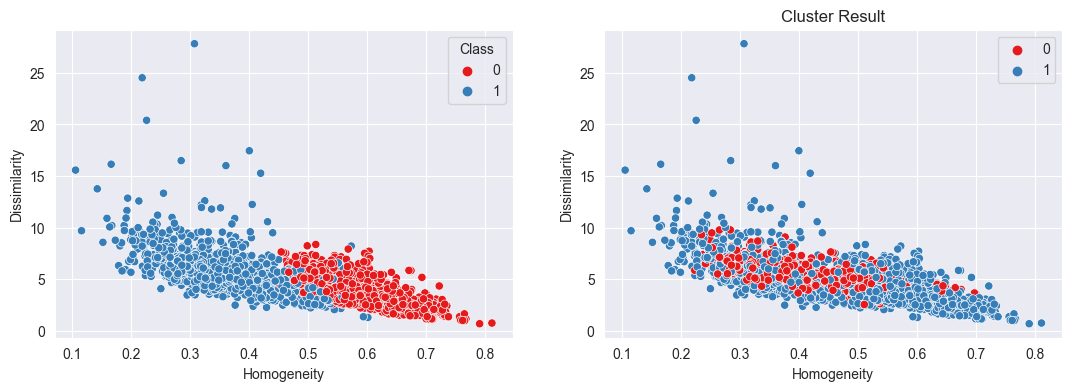

In [169]:
fig, ax = plt.subplots(1, 2, figsize = (13, 4))

# 原始 tag
ax[1].set_title("Class Tag")
sns.scatterplot(x=data.iloc[:, 10], y=data.iloc[:, 11], ax=ax[0], hue=init_tag, palette='Set1')

# 聚类结果
ax[1].set_title("Cluster Result")
sns.scatterplot(x=data.iloc[:, 10], y=data.iloc[:, 11], ax=ax[1], hue=clustered, palette='Set1')

可以看出来 K-Means 聚类的结果和原本的 Class 不太一致
> 事实上一致率大概在 65~70%，可以参考下面代码的输出

=> 大概可以证明同一个 Class 中各 Feature 的数据分布不太一致

In [209]:
# 因为 cluster 标注的 0-1 结果可能恰巧与原本的 tag 相反，此处取 max 值
def calc_consistency(res1, res2):
    assert(len(res1) == len(res2))
    count = 0
    total = len(res1)

    for r1, r2 in zip(res1, res2):
        if r1 == r2:
            count += 1
    
    count = max(count, total-count)
    print("原 Class 与 聚类结果 的一致率：", '{:.2f}'.format(count/total*100), "%")

calc_consistency(init_tag.tolist(), clustered.values.tolist())

原 Class 与 聚类结果 的一致率： 66.19 %


2. 应用分类器，并与 #2 中的性能进行对比

    - 此处基于 K-Means 聚类结果将原本的数据集划分为两类

    - 训练的标注与最终预测结果的对比标准还是源本数据集中的 `Class` 标注

In [202]:
# 基于聚类结果重新划分一下 data
data['Cluster'] = clustered
type_0 = data.loc[data['Cluster'] == 0]
type_1 = data.loc[data['Cluster'] == 1]

print("在", data.shape[0], "条数据中，共有", type_0.shape[0], "条 type = 0, ", type_1.shape[0], "条 type = 1")

在 3762 条数据中，共有 1067 条 type = 0,  2695 条 type = 1


In [203]:
# 给两类数据重新划分一下 训练/测试 集
X0 = type_0.iloc[:, 1:14].to_numpy()
Y0 = type_0.loc[:, 'Class'].tolist()
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.2)
print("type = 0 - 训练集数据量：", len(Y0_train), ", 测试集数据量：", len(Y0_test))

X1 = type_1.iloc[:, 1:14].to_numpy()
Y1 = type_1.loc[:, 'Class'].tolist()
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)
print("type = 1 - 训练集数据量：", len(Y1_train), ", 测试集数据量：", len(Y1_test))


type = 0 - 训练集数据量： 853 , 测试集数据量： 214
type = 1 - 训练集数据量： 2156 , 测试集数据量： 539


In [208]:
# 训练模型
print("For type = 0:")
start = time.time()
classifier0 = Beyes()
classifier0.fit(X0_train, Y0_train)
end = time.time()
print("training time:", end-start)
start = time.time()
classifier0.classifier(X0_test)
end = time.time()
print("predict time:", end-start)
classifier0.score(Y0_test)

print("\nFor type = 1:")
start = time.time()
classifier1 = Beyes()
classifier1.fit(X1_train, Y1_train)
end = time.time()
print("training time:", end-start)
start = time.time()
classifier1.classifier(X1_test)
end = time.time()
print("predict time:", end-start)
classifier1.score(Y1_test)

For type = 0:
training time: 0.003052234649658203
predict time: 0.3238861560821533
accuracy:  100.00 %

For type = 1:
training time: 0.0014190673828125
predict time: 1.777406930923462
accuracy:  100.00 %


为方便对比，这里贴一下对未进行聚类操作的数据集直接进行分类的结果：

- `training time`: 0.0047757625579833984

- `predict time`: 3.57155179977417
    
- `accuracy`:  51.79 %

3. 分析

> “先聚类，后分类” 一般用于无数据标注的非监督学习过程，用在已经标注的数据集上略微有些奇怪

- 对比上面的三个数据可以发现，对聚类后的数据集应用分类器在所有性能上都具有显著的提升

    - `training time` & `predict time` 这两个指标事实上直接与算法复杂度相关
    
        此处应该是由训练集大小引起的差异，暂且不论
        
    - `accuracy` 在 #3 中有着显著提升：50% -> 100%， 100%

        在 3.1 中我们对聚类结果与原 Class 标注结果进行了对比，可以看到两者不太一致

        - 猜想是因为数据集中包含了两种不同 Tumor 的数据，这两种 Tumor 在各个 Feature 上呈现的数值存在差异，导致对全部数据应用同一个分类器得到的准确率较低

        - 而通过“先聚类，后分类“的方法可以先确定 Tumor 的具体种类，再使用针对该类 Tumor 数据训练的分类器进行预测，从而显著提升预测的准确性